<a href="https://colab.research.google.com/github/rndrpp/ID-X-Partners-Data-Scientist-Virtual-Internship-Program/blob/main/VIX_IDX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/loan_data_2007_2014.csv', index_col = 0)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.isnull().mean().sort_values(ascending = False)

inq_last_12m                 1.0
verification_status_joint    1.0
open_acc_6m                  1.0
open_il_6m                   1.0
open_il_12m                  1.0
                            ... 
total_pymnt                  0.0
total_pymnt_inv              0.0
total_rec_prncp              0.0
total_rec_int                0.0
out_prncp_inv                0.0
Length: 74, dtype: float64

In [ ]:
df_clean.dropna(thresh = df_clean.shape[0]*0.3, how = 'all', axis = 1, inplace = True)

df_clean.isnull().mean().sort_values(ascending = False)

mths_since_last_delinq        0.536906
next_pymnt_d                  0.487286
tot_cur_bal                   0.150715
tot_coll_amt                  0.150715
total_rev_hi_lim              0.150715
emp_title                     0.059166
emp_length                    0.045054
last_pymnt_d                  0.000806
revol_util                    0.000729
collections_12_mths_ex_med    0.000311
last_credit_pull_d            0.000090
total_acc                     0.000062
open_acc                      0.000062
inq_last_6mths                0.000062
earliest_cr_line              0.000062
delinq_2yrs                   0.000062
pub_rec                       0.000062
acc_now_delinq                0.000062
title                         0.000043
annual_inc                    0.000009
application_type              0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int            

In [ ]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
drop_col= ['id', 'member_id', 'emp_title', 'url', 'title', 'zip_code', 
           'addr_state', 'mths_since_last_delinq', 'policy_code', 
           'application_type', 'issue_d','pymnt_plan', 'out_prncp', 
           'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
           'total_rec_int', 'total_rec_late_fee', 'recoveries', 
           'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
           'next_pymnt_d']

df_clean.drop(columns = drop_col, axis = 1, inplace = True)

In [ ]:
nums = df_clean.select_dtypes(exclude='object').columns.tolist()
for num in nums:
    print(f'{num} total unique value: {df_clean[num].nunique()}')

loan_amnt total unique value: 1352
funded_amnt total unique value: 1354
funded_amnt_inv total unique value: 9854
int_rate total unique value: 506
installment total unique value: 55622
annual_inc total unique value: 31901
dti total unique value: 3997
delinq_2yrs total unique value: 24
inq_last_6mths total unique value: 28
open_acc total unique value: 62
pub_rec total unique value: 26
revol_bal total unique value: 58142
revol_util total unique value: 1269
total_acc total unique value: 112
collections_12_mths_ex_med total unique value: 9
acc_now_delinq total unique value: 6
tot_coll_amt total unique value: 6321
tot_cur_bal total unique value: 220690
total_rev_hi_lim total unique value: 14612


In [ ]:
cats = df_clean.select_dtypes(include='object').columns.tolist()
for cat in cats:
    print(f'{cat} total unique value: {df_clean[cat].nunique()}')
    print(f'{cat} values: {df_clean[cat].unique().tolist()} ', '\n')

term total unique value: 2
term values: [' 36 months', ' 60 months']  

grade total unique value: 7
grade values: ['B', 'C', 'A', 'E', 'F', 'D', 'G']  

sub_grade total unique value: 35
sub_grade values: ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1', 'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1', 'F5', 'G5']  

emp_length total unique value: 11
emp_length values: ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years', nan]  

home_ownership total unique value: 6
home_ownership values: ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']  

verification_status total unique value: 3
verification_status values: ['Verified', 'Source Verified', 'Not Verified']  

loan_status total unique value: 9
loan_status values: ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 d

In [ ]:
df_clean['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
approve_loans = ['Current', 'Fully Paid', 'In Grace Period', 
                 'Does not meet the credit policy. Status:Fully Paid']

df_clean['approve_loan'] = np.where(df_clean['loan_status'].isin(approve_loans), 1, 0)

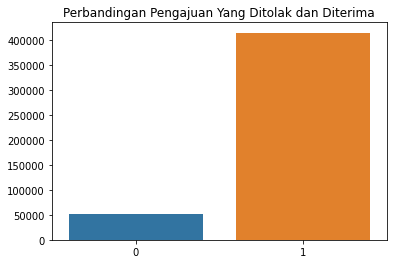

In [ ]:
sns.barplot(x=df_clean['approve_loan'].value_counts().index, 
            y=df_clean['approve_loan'].value_counts().values)

plt.title('Perbandingan Pengajuan Yang Ditolak dan Diterima')

plt.show();

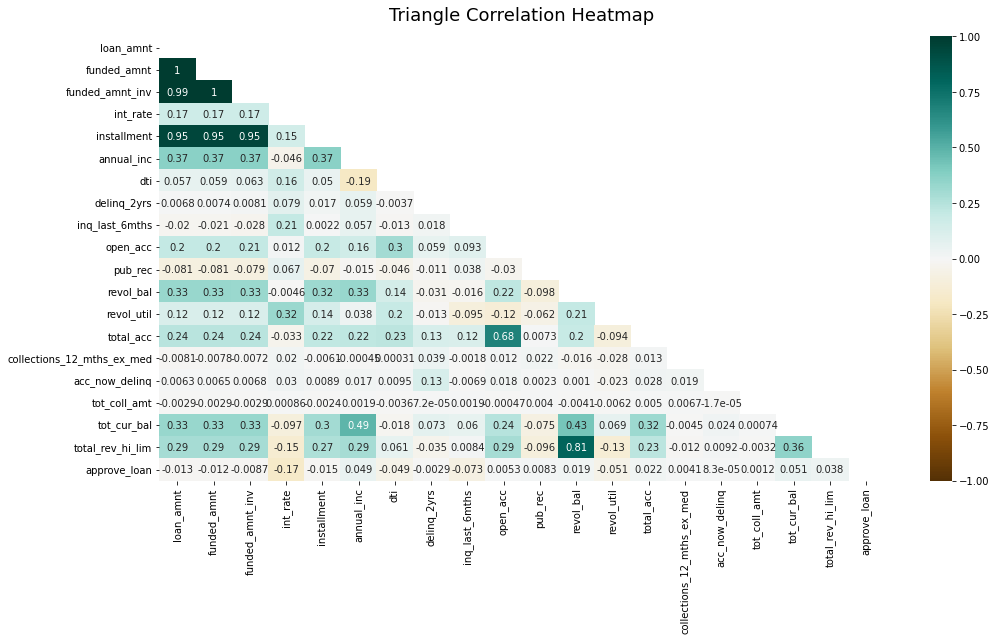

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))

mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
ax = sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show();

In [ ]:
df_clean[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888
std,8286.509164,8274.371300,8297.637788
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12000.000000,12000.000000,12000.000000
75%,20000.000000,20000.000000,19950.000000
max,35000.000000,35000.000000,35000.000000


In [ ]:
high_corr = ['funded_amnt', 'funded_amnt_inv']

df_clean.drop(columns = high_corr, axis = 1, inplace = True)

# Data Preprocessing

In [ ]:
df_clean.isnull().mean().sort_values(ascending = False)

total_rev_hi_lim              0.150715
tot_cur_bal                   0.150715
tot_coll_amt                  0.150715
emp_length                    0.045054
revol_util                    0.000729
collections_12_mths_ex_med    0.000311
last_credit_pull_d            0.000090
earliest_cr_line              0.000062
total_acc                     0.000062
inq_last_6mths                0.000062
delinq_2yrs                   0.000062
open_acc                      0.000062
pub_rec                       0.000062
acc_now_delinq                0.000062
annual_inc                    0.000009
initial_list_status           0.000000
revol_bal                     0.000000
loan_amnt                     0.000000
term                          0.000000
dti                           0.000000
purpose                       0.000000
loan_status                   0.000000
verification_status           0.000000
home_ownership                0.000000
sub_grade                     0.000000
grade                    

In [ ]:
df[['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']].describe()

,total_rev_hi_lim,tot_cur_bal,tot_coll_amt
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,3.037909e+04,1.388017e+05,1.919135e+02
std,3.724713e+04,1.521147e+05,1.463021e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.350000e+04,2.861800e+04,0.000000e+00
50%,2.280000e+04,8.153900e+04,0.000000e+00
75%,3.790000e+04,2.089530e+05,0.000000e+00
max,9.999999e+06,8.000078e+06,9.152545e+06


In [ ]:
df[['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']].sample(5)

,total_rev_hi_lim,tot_cur_bal,tot_coll_amt
14981,NaN,NaN,NaN
388615,12900.0,17766.0,0.0
413493,18300.0,102900.0,0.0
106991,4100.0,19489.0,0.0
251176,3800.0,2827.0,0.0


In [ ]:
df_clean.dropna(subset = ['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt'], inplace = True)
df_clean.reset_index(drop= True, inplace = True)

In [ ]:
df_clean.isnull().mean().sort_values(ascending = False)

emp_length                    0.047845
revol_util                    0.000553
last_credit_pull_d            0.000096
loan_amnt                     0.000000
inq_last_6mths                0.000000
total_rev_hi_lim              0.000000
tot_cur_bal                   0.000000
tot_coll_amt                  0.000000
acc_now_delinq                0.000000
collections_12_mths_ex_med    0.000000
initial_list_status           0.000000
total_acc                     0.000000
revol_bal                     0.000000
pub_rec                       0.000000
open_acc                      0.000000
earliest_cr_line              0.000000
term                          0.000000
delinq_2yrs                   0.000000
dti                           0.000000
purpose                       0.000000
loan_status                   0.000000
verification_status           0.000000
annual_inc                    0.000000
home_ownership                0.000000
sub_grade                     0.000000
grade                    

In [ ]:
df_clean['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [ ]:
df_clean['emp_length'].describe()

count        377062
unique           11
top       10+ years
freq         133152
Name: emp_length, dtype: object

In [ ]:
map_emp = { '< 1 year' : '0', '1 year' : '1', '2 years' : '2', '3 years' : '3',
           '4 years' : '4', '5 years' : '5', '6 years' : '6', '7 years' : '7', 
           '8 years' : '8', '9 years' : '9', '10+ years' : '10'}

df_clean['emp_length'] = df_clean['emp_length'].map(map_emp).fillna(10).astype(int)

In [ ]:
df_clean[['revol_util']].describe()

,revol_util
count,395790.000000
mean,56.886942
std,22.955480
min,0.000000
25%,40.500000
50%,58.000000
75%,74.700000
max,892.300000


In [ ]:
df_clean['revol_util'].fillna(df_clean['revol_util'].mean(), inplace = True)

df_clean['revol_util'].describe()

count    396009.000000
mean         56.886942
std          22.949132
min           0.000000
25%          40.500000
50%          58.000000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

In [ ]:
df_clean['last_credit_pull_d'].unique()

array(['Dec-15', 'Jan-16', 'Aug-14', 'Aug-15', 'May-14', 'Mar-15',
       'Mar-14', 'Jan-14', 'May-15', 'Oct-15', 'Nov-15', 'Oct-14',
       'Apr-14', 'Jul-15', 'Apr-15', 'Sep-14', 'Sep-15', 'Dec-14',
       'Nov-14', 'Jan-15', 'Jun-15', 'Jul-14', 'Feb-14', 'Jun-14',
       'Feb-15', 'Nov-13', 'Dec-13', nan, 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12'],
      dtype=object)

In [ ]:
df_clean['last_credit_pull_d'].describe()

count     395971
unique        42
top       Jan-16
freq      303172
Name: last_credit_pull_d, dtype: object

In [ ]:
df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean['last_credit_pull_d'], 
                                                format = '%b-%y').fillna(pd.to_datetime("2016-01-01"))

In [ ]:
df_clean['last_credit_pull_d'].max()

Timestamp('2016-01-01 00:00:00')

In [ ]:
df_clean['mnth_since_last_credit'] = round(pd.to_numeric((
    df_clean['last_credit_pull_d'].max() - df_clean['last_credit_pull_d'])/ 
    np.timedelta64(1, 'M'))).astype(int)

In [ ]:
df_clean[['mnth_since_last_credit']]

,mnth_since_last_credit
0,1
1,0
2,0
3,0
4,0
...,...
396004,0
396005,0
396006,1
396007,9


In [ ]:
df_clean.drop(columns = 'last_credit_pull_d', axis = 1, inplace = True)

In [ ]:
df_clean.isnull().mean().sort_values(ascending = False)

loan_amnt                     0.0
inq_last_6mths                0.0
approve_loan                  0.0
total_rev_hi_lim              0.0
tot_cur_bal                   0.0
tot_coll_amt                  0.0
acc_now_delinq                0.0
collections_12_mths_ex_med    0.0
initial_list_status           0.0
total_acc                     0.0
revol_util                    0.0
revol_bal                     0.0
pub_rec                       0.0
open_acc                      0.0
earliest_cr_line              0.0
term                          0.0
delinq_2yrs                   0.0
dti                           0.0
purpose                       0.0
loan_status                   0.0
verification_status           0.0
annual_inc                    0.0
home_ownership                0.0
emp_length                    0.0
sub_grade                     0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
mnth_since_last_credit        0.0
dtype: float64

## Normalization and Standarization

In [ ]:
df_processed = df_clean.copy()

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396009 entries, 0 to 396008
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   396009 non-null  int64  
 1   term                        396009 non-null  object 
 2   int_rate                    396009 non-null  float64
 3   installment                 396009 non-null  float64
 4   grade                       396009 non-null  object 
 5   sub_grade                   396009 non-null  object 
 6   emp_length                  396009 non-null  int64  
 7   home_ownership              396009 non-null  object 
 8   annual_inc                  396009 non-null  float64
 9   verification_status         396009 non-null  object 
 10  loan_status                 396009 non-null  object 
 11  purpose                     396009 non-null  object 
 12  dti                         396009 non-null  float64
 13  delinq_2yrs   

In [ ]:
df_processed.select_dtypes(exclude='object').columns.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'approve_loan',
 'mnth_since_last_credit']

In [ ]:
nums = cats = df_processed.select_dtypes(exclude='object').columns.tolist()

scaler = StandardScaler()

for col in nums:
  if col != 'approve_loan':
    df_processed[col] = scaler.fit_transform(df_processed[col].values.reshape(-1, 1))

In [ ]:
cats = df_processed.select_dtypes(include='object').columns.tolist()

df_processed = pd.get_dummies(df_processed, columns = cats, drop_first=True)

# Modeling

In [ ]:
X = df_processed.loc[:, df_processed.columns != 'approve_loan'] 
y = df_processed['approve_loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
oversampler=SMOTE(random_state=0)
X_smote, y_smote = oversampler.fit_resample(X_train, y_train)

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=6, criterion='gini')

rfc.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [ ]:
pred=rfc.predict(X_test)

cf_matrix = confusion_matrix(y_test,pred)

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9211330643461274


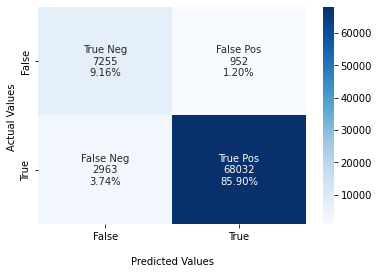

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix .flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix .flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix , annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# !pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import sklearn.metrics

print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      8207
           1       0.99      0.96      0.97     70995

    accuracy                           0.95     79202
   macro avg       0.85      0.92      0.88     79202
weighted avg       0.96      0.95      0.95     79202



In [ ]:
import shap

explainer = shap.TreeExplainer(rfc)

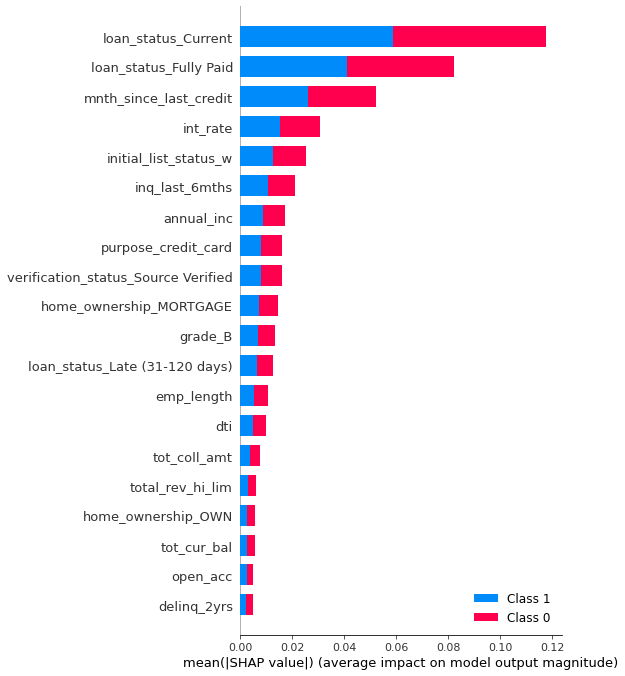

In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


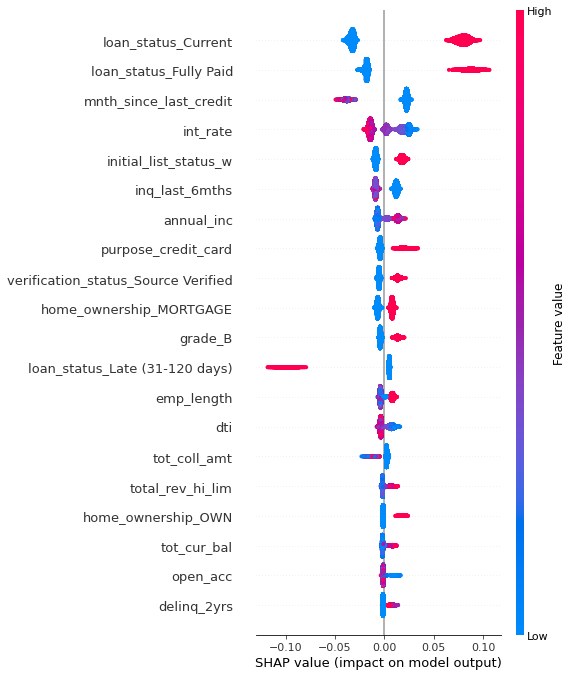

In [ ]:
shap.summary_plot(shap_values[1], X_test)